# Jupyter Notebook Embedding Example

In this example, CellSium is embedded in a Jupyter notebook to interactively run small simulations.

First, the necessary modules are imported:

In [1]:
# plotting
from matplotlib_inline.backend_inline import set_matplotlib_formats
set_matplotlib_formats('svg')
from matplotlib import pyplot

# general
from functools import partial

# RRF is the central random helper, used for seeding
from cellsium.random import RRF
# the model parts the new model is built upon
from cellsium.model import PlacedCell, SimulatedCell, assemble_cell
# the functions to actually perform the simulation
from cellsium.cli.simulate import perform_simulation, initialize_cells, h_to_s, s_to_h
# the PlotRenderer as it embeds nicely in Jupyter
from cellsium.output.plot import PlotRenderer

For the example, a model is defined directly within a Jupyter cell:

In [2]:
class SizerCell(SimulatedCell):
    @staticmethod
    def random_sequences(sequence):
        return dict(elongation_rate=sequence.normal(1.5, 0.25))  # µm·h⁻¹

    def birth(
        self, parent=None, ts=None
    ) -> None:
        self.elongation_rate = next(self.random.elongation_rate)
        self.division_time = h_to_s(0.5)  # fast division rate

    def grow(self, ts):
        self.length += self.elongation_rate * ts.hours
        
        if ts.time > (self.birth_time + self.division_time):
            offspring_a, offspring_b = self.divide(ts)
            offspring_a.length = offspring_b.length = self.length / 2

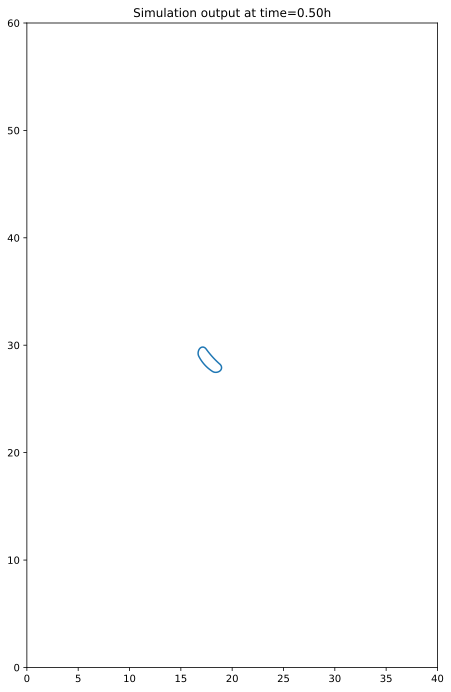

[Cell(angle=2.3294692309443428, bend_lower=-0.016261360844027475, bend_overall=-0.04126808565523994, bend_upper=-0.09614075306364522, birth_time=0.0, division_time=1800.0, elongation_rate=1.5981931788501658, id_=1, length=2.872894940610261, lineage_history=[0], parent_id=0, position=[17.854225629902448, 28.67645476278087], width=0.8960666826747447)]


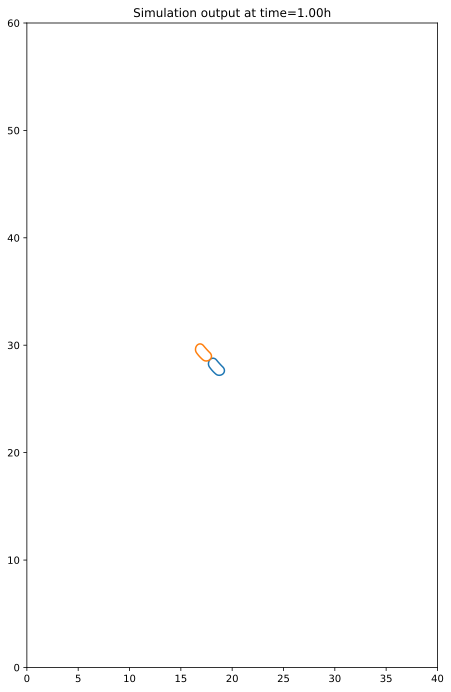

[Cell(angle=2.3294692309443428, bend_lower=-0.016261360844027475, bend_overall=-0.04126808565523994, bend_upper=-0.09614075306364522, birth_time=3600.0, division_time=1800.0, elongation_rate=1.4017119040732795, id_=2, length=1.835995765017672, lineage_history=[0, 1], parent_id=1, position=[18.485770454254308, 28.010218132802386], width=0.8960666826747447), Cell(angle=2.3294692309443428, bend_lower=-0.016261360844027475, bend_overall=-0.04126808565523994, bend_upper=-0.09614075306364522, birth_time=3600.0, division_time=1800.0, elongation_rate=1.7743185975635118, id_=3, length=1.835995765017672, lineage_history=[0, 1], parent_id=1, position=[17.22268080555059, 29.342691392759356], width=0.8960666826747447)]


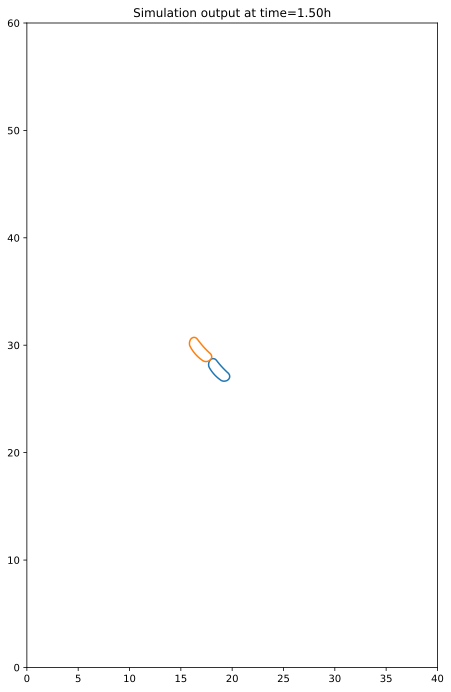

[Cell(angle=2.3360626329715437, bend_lower=-0.016261360844027475, bend_overall=-0.04126808565523994, bend_upper=-0.09614075306364522, birth_time=3600.0, division_time=1800.0, elongation_rate=1.4017119040732795, id_=2, length=2.5368517170543115, lineage_history=[0, 1], parent_id=1, position=[18.756872759489948, 27.72423023484169], width=0.8960666826747447), Cell(angle=2.3228640880321927, bend_lower=-0.016261360844027475, bend_overall=-0.04126808565523994, bend_upper=-0.09614075306364522, birth_time=3600.0, division_time=1800.0, elongation_rate=1.7743185975635118, id_=3, length=2.7231550637994277, lineage_history=[0, 1], parent_id=1, position=[16.951578500314948, 29.62867929072005], width=0.8960666826747447)]


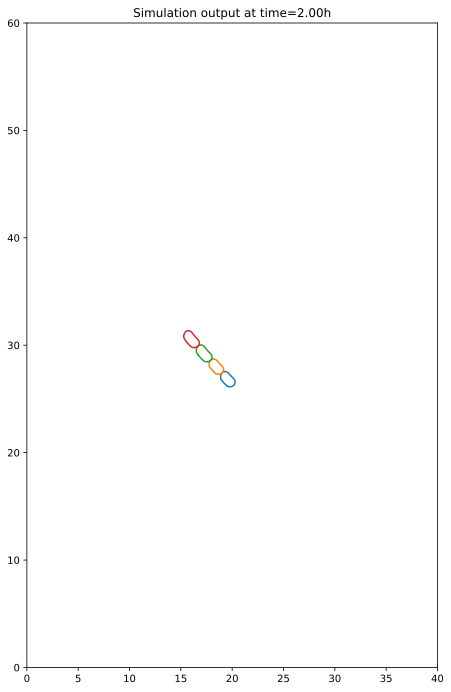

[Cell(angle=2.352798559960036, bend_lower=-0.016261360844027475, bend_overall=-0.04126808565523994, bend_upper=-0.09614075306364522, birth_time=7200.0, division_time=1800.0, elongation_rate=0.8317980611709823, id_=4, length=1.6188538345454755, lineage_history=[0, 1, 2], parent_id=2, position=[19.593155424028517, 26.85358455987381], width=0.8960666826747447), Cell(angle=2.3416190585127383, bend_lower=-0.016261360844027475, bend_overall=-0.04126808565523994, bend_upper=-0.09614075306364522, birth_time=7200.0, division_time=1800.0, elongation_rate=1.2231841085165691, id_=5, length=1.6188538345454755, lineage_history=[0, 1, 2], parent_id=2, position=[18.471310193545275, 28.02153383690875], width=0.8960666826747447), Cell(angle=2.314495314084782, bend_lower=-0.016261360844027475, bend_overall=-0.04126808565523994, bend_upper=-0.09614075306364522, birth_time=7200.0, division_time=1800.0, elongation_rate=1.4247110511570817, id_=6, length=1.8051571812905918, lineage_history=[0, 1, 3], parent_i

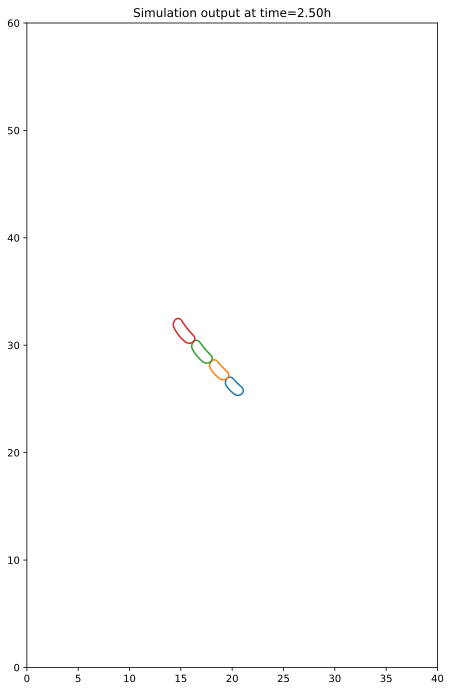

[Cell(angle=2.3820603181599442, bend_lower=-0.016261360844027475, bend_overall=-0.04126808565523994, bend_upper=-0.09614075306364522, birth_time=7200.0, division_time=1800.0, elongation_rate=0.8317980611709823, id_=4, length=2.0347528651309665, lineage_history=[0, 1, 2], parent_id=2, position=[20.228643748180197, 26.199313752340714], width=0.8960666826747447), Cell(angle=2.3526475982043165, bend_lower=-0.016261360844027475, bend_overall=-0.04126808565523994, bend_upper=-0.09614075306364522, birth_time=7200.0, division_time=1800.0, elongation_rate=1.2231841085165691, id_=5, length=2.23044588880376, lineage_history=[0, 1, 2], parent_id=2, position=[18.75284683312141, 27.731672298371393], width=0.8960666826747447), Cell(angle=2.2968665429831496, bend_lower=-0.016261360844027475, bend_overall=-0.04126808565523994, bend_upper=-0.09614075306364522, birth_time=7200.0, division_time=1800.0, elongation_rate=1.4247110511570817, id_=6, length=2.5175127068691325, lineage_history=[0, 1, 3], parent_

In [3]:
# seed the random number generator
RRF.seed(1)

# perform_simulation returns an iterator which will indefinitely yield timesteps

simulation_iterator = perform_simulation(
    setup=partial(
        initialize_cells,
        count=1,
        cell_type=assemble_cell(SizerCell, placed_cell=PlacedCell)),
    time_step=30.0 * 60.0
)

# we step thru the first 5 of them ...
for _, ts in zip(range(5), simulation_iterator):
    # ... and plot them
    PlotRenderer().output(world=ts.world)
    pyplot.title("Simulation output at time=%.2fh" % (s_to_h(ts.time)))
    pyplot.show()
    # we have access to the Cell objects as well
    print(repr(ts.world.cells))